<a href="https://colab.research.google.com/github/sathizz7/Image-Classification/blob/main/Image_Classf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification using ANN and CNN

Import Required Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers , models
import matplotlib.pyplot as plt
import numpy as np

#Load Dataset

This Datset is available in tensorflow.kers import datasets, so we can load it from There

In [ ]:
(Xtrain, ytrain) , (Xtest, ytest) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print(Xtrain.shape)

(50000, 32, 32, 3)

In [ ]:
print(ytrain.shape)

(50000, 1)

Here we see there are 50000 training images and 1000 test images

In [ ]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
ytrain = ytrain.reshape(-1, )
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
ytest = ytest.reshape(-1, )
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Plot some images to see what they are

In [ ]:
def plot_img(X,y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

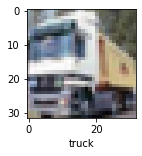

In [ ]:
plot_img(Xtrain, ytrain, 1)

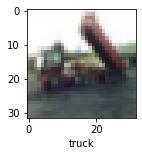

In [ ]:
plot_img(Xtrain, ytrain, 2)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the data

In [ ]:
Xtrain = Xtrain/ 255
Xtest = Xtest/255

#Building  Artificial neural network for image classification

In [ ]:
Ann = models.Sequential([layers.Flatten(input_shape = (32,32,3)),
                        layers.Dense(3000, activation = 'relu'),
                        layers.Dense(1000, activation = 'relu'),
                        layers.Dense(10, activation = 'softmax')])

In [ ]:
Ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
Ann.fit(Xtrain, ytrain, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 127s 81ms/step - loss: 1.8087 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 146s 94ms/step - loss: 1.6214 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5408 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4817 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4315 - accuracy: 0.4974


You can see that at the end of 5 epochs, accuracy is at around 49%

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
ypred = Ann.predict(Xtest)
ypred_classes = [np.argmax(element) for element in ypred]

print('Classification Report \n',classification_report(ytest, ypred_classes))

313/313 [==============================] - 10s 30ms/step
Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.38      0.49      1000
           1       0.72      0.46      0.56      1000
           2       0.40      0.24      0.30      1000
           3       0.31      0.42      0.36      1000
           4       0.42      0.47      0.44      1000
           5       0.36      0.37      0.36      1000
           6       0.45      0.64      0.53      1000
           7       0.67      0.40      0.50      1000
           8       0.47      0.77      0.58      1000
           9       0.54      0.57      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



#Now let us build a convolutional neural network to train our images

In [ ]:
Cnn = models.Sequential([layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', 
                                        input_shape = (32,32,3)),layers.MaxPooling2D((2,2)),
                         
                         layers.Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu'),
                         layers.MaxPooling2D((2,2)),

                         layers.Flatten(),
                         layers.Dense(64, activation = 'relu'),
                         layers.Dense(10, activation = 'softmax')])

In [ ]:
Cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
Cnn.fit(Xtrain,ytrain, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4659 - accuracy: 0.4738
Epoch 2/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.1157 - accuracy: 0.6095
Epoch 3/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.9763 - accuracy: 0.6601
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8903 - accuracy: 0.6909
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8261 - accuracy: 0.7130
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7724 - accuracy: 0.7310
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7219 - accuracy: 0.7486
Epoch 8/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6734 - accuracy: 0.7666
Epoch 9/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6343 - accuracy: 0.7804
Epoch 10/10
1563/1563 [==============================] - 72s 46

With CNN, at the end 10 epochs, accuracy was at around 69% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features.

In [ ]:
Cnn.evaluate(Xtest, ytest)

313/313 [==============================] - 5s 14ms/step - loss: 0.9568 - accuracy: 0.6932


[0.9567537903785706, 0.6931999921798706]

In [ ]:
ypred = Cnn.predict(Xtest)
ypred[:5]

313/313 [==============================] - 4s 13ms/step


array([[2.6785953e-03, 1.0130139e-04, 4.4353368e-05, 8.7689960e-01,
        1.6421589e-04, 5.8818392e-02, 5.8723405e-02, 3.0899864e-05,
        1.9904899e-03, 5.4880464e-04],
       [2.5798390e-03, 3.0015936e-02, 8.7348144e-06, 5.8249980e-06,
        1.1372317e-07, 4.6723843e-09, 8.3343885e-08, 2.6505720e-08,
        9.6442980e-01, 2.9594777e-03],
       [9.6706606e-02, 1.9194938e-01, 3.1324492e-03, 5.4175328e-03,
        1.1377761e-03, 3.6709771e-05, 3.6758116e-05, 1.0623758e-03,
        6.7284477e-01, 2.7675638e-02],
       [8.9736527e-01, 2.7030561e-04, 2.5389092e-02, 1.9776849e-04,
        4.9476983e-04, 4.9031469e-06, 1.1428150e-04, 2.2957445e-05,
        7.5852193e-02, 2.8833409e-04],
       [2.4367480e-06, 3.4025486e-06, 2.2559352e-03, 4.1891109e-02,
        4.2499936e-01, 1.6492309e-02, 5.1434487e-01, 9.9481576e-06,
        3.5276716e-07, 2.4903966e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in ypred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

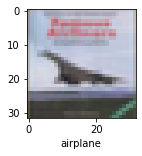

In [ ]:
plot_img(Xtest, ytest, 3)

In [ ]:
classes[y_classes[3]]

'airplane'

For the unclear img like this the 70 % is Great.

In [ ]:
print('Classification Report \n',classification_report(ytest, y_classes))

Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.70      0.90      0.79      1000
           2       0.67      0.52      0.59      1000
           3       0.51      0.47      0.49      1000
           4       0.68      0.63      0.65      1000
           5       0.59      0.65      0.62      1000
           6       0.75      0.78      0.77      1000
           7       0.83      0.67      0.74      1000
           8       0.72      0.85      0.78      1000
           9       0.74      0.75      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



Concluslion :
* Cnn as better score than Ann
*The accuracy of ANN is around 49%
*The accuracy of CNN is around 69%